# Introduction
This code shows some basic steps in doing a ML project using pipeline. I made some modifications so the whole process looks easier to understand.

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from functools import reduce
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.ensemble import IsolationForest

In [8]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
import pandas as pd
df_raw = pd.read_csv('housing.csv')
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
df_raw.isnull().apply(sum) # check the null value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [20]:
df_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Check Data Distribution and Correlation
So that we can determine whether to creat new variables and transform existing variables.

## Distribution Plot

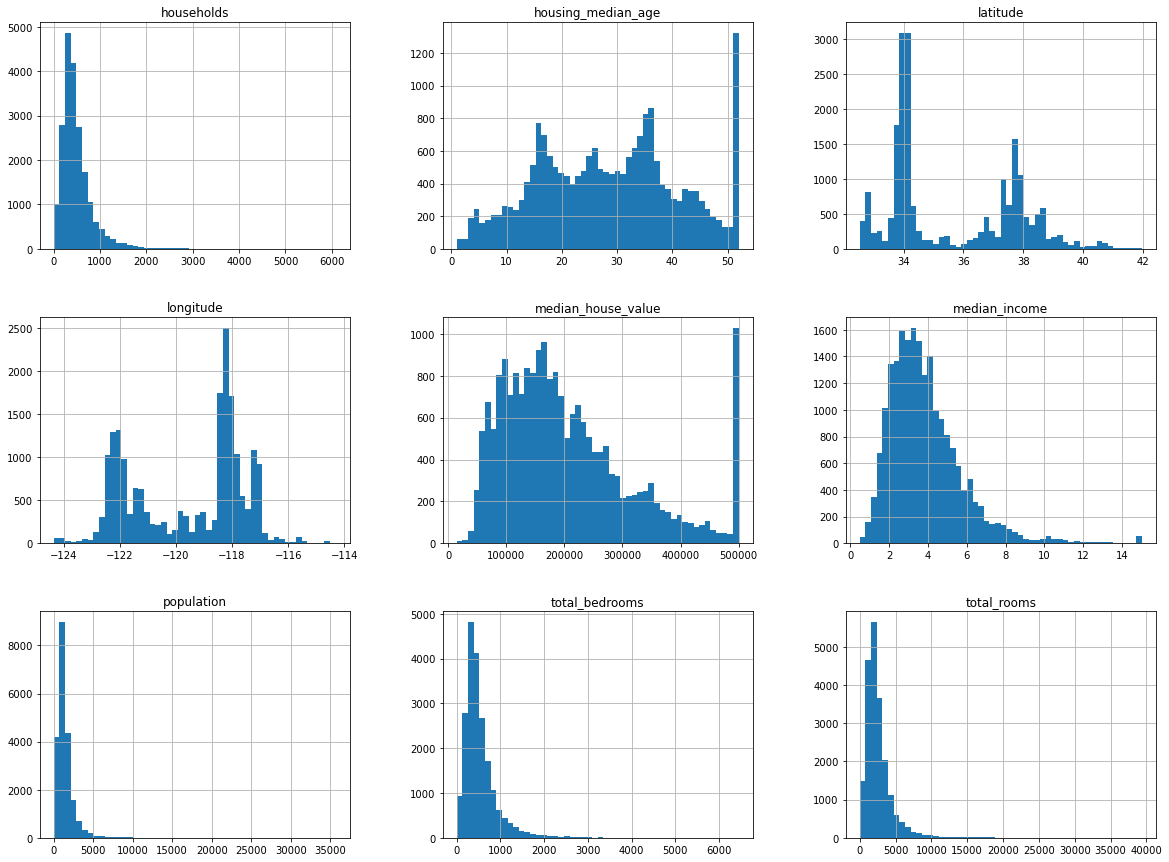

In [24]:
import matplotlib.pyplot as plt
df_raw.hist(bins=50, figsize=(20,15))
plt.show()

## Pay attention: 
### is the target variable censored?
### are the varialbes highe skewed? if so, some transformation may be needed.  
### In this instance, there are censored data in target variables. May need taken care of.

## Correlation


In [27]:
corr_matrix = df_raw.corr()
corr_matrix
# Intuitively, the household income and population, which determins the housing demand ,
# and the house structure itself (age, room numbers), together determine the value of house 

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.119034,0.105623,-0.153277,0.136089,0.013191
median_income,-0.015176,-0.079809,-0.119034,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.326895,0.151948,1.000000,-0.416952,-0.004852
bedrooms_per_room,0.092657,-0.113815,0.136089,-0.615661,-0.255880,-0.416952,1.000000,0.002938
population_per_household,0.002476,0.002366,0.013191,0.018766,-0.023737,-0.004852,0.002938,1.000000


# Add Some New Variables


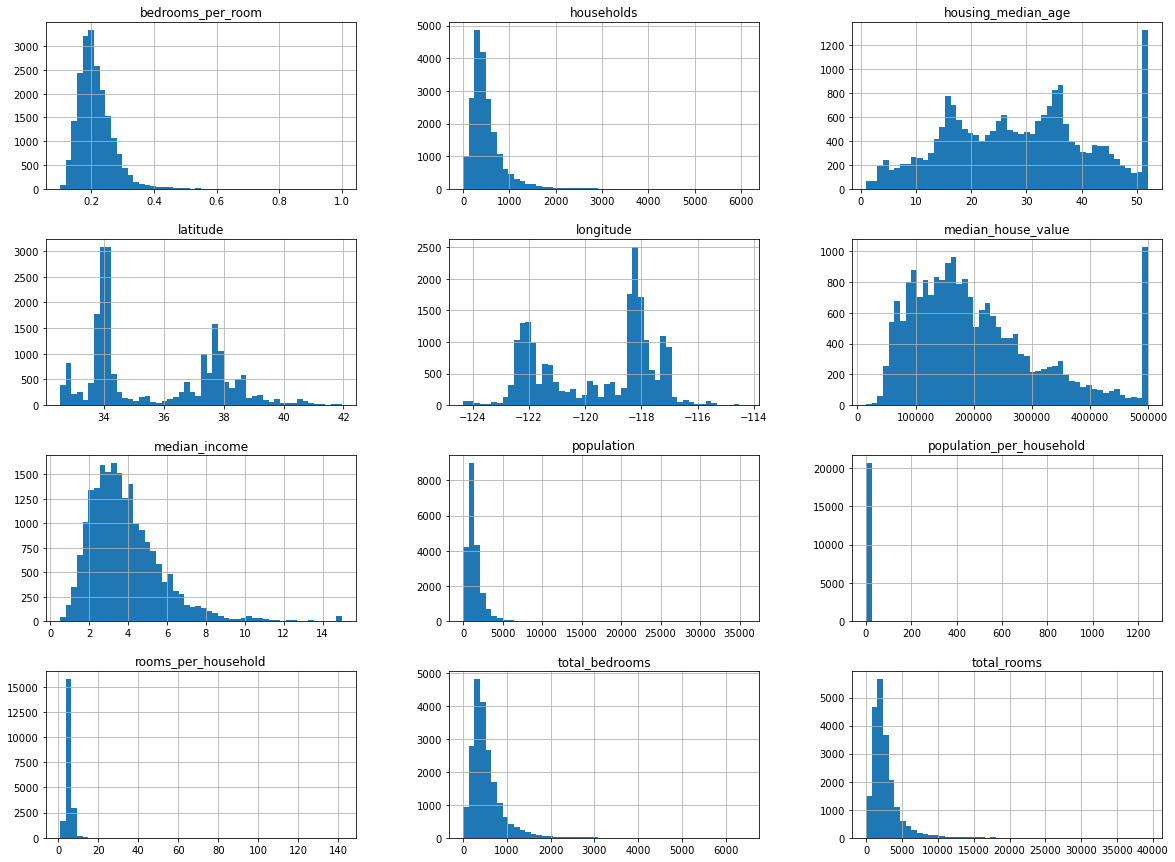

In [3]:
import matplotlib.pyplot as plt
df_house = df_raw.copy()
df_house['rooms_per_household'] = df_raw['total_rooms']/df_raw['households']
df_house['population_per_household'] = df_raw['population']/df_raw['households']
df_house['bedrooms_per_room'] = df_raw['total_bedrooms']/df_raw['total_rooms']
#df_house = df_house.drop(['total_rooms','population','households','total_bedrooms'], axis = 1)
df_house.hist(bins=50, figsize=(20,15))
plt.show()
# Many variables have skewed distribuion, especially the target variable, median house value.
# we need to make some transformation

# Data Splitting

In [44]:
# split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_house, test_size=0.2, random_state=42)
## of course, may want to spend sometime on the strafitied sampling 

# Create pipelines for data pocessing.

## Some rules for writing (custom) pipeline

- All but the last class must have fit_transform method, or have both fit and transform method. The last class must have fit method. 
- In practice, when we are writing a custom class, no matter whether it is the last class or not, be sure to write like the following
    - must write a fit function, with function input as (self, x, y = None). do nothing in this fit function. only return self
    - write a transform function, with function input as (self, x, y = None). write down the transformation we want
- When call the pipeline, remember, your pipeline has the same methods as the last class:
    - If the pipeline is for data transformation, we recommend calling like this: mypipeline_name.fit_transform(data). (must use fit_transform)
    - If the pipeline is for model training, since most of the time the last class must be an estimator, we recommend calling the pipeline like this: mypipeline_name.fit(x,y)

Above is the most safe way to write pipeline.



In [ ]:
# a template of transformer:
class MyTransformer(object): # 
    def __init__(self, some_attribute): # no *args or **kargs
        self.some_attribute = some_attribute
    def fit(self, X, y =None):  # must have this fit function! be sure to write the input as (self, x, y = none)
        # This make sense: 'fit' itself means that we need both x and y
        # don't do anything here!
        return self  
    def transform(self,X, y =None): # must have this transform function! be sure to write the input as (self, x, y = none). y = none can be omitted.
        # write down the transformation you want to do.
        return (something...)

## Custom Pipeline: Turn the array back to the dataframe

In [51]:
class BacktoDF(object): # 
    def __init__(self, colnames): # no *args or **kargs
        self.colnames = colnames
    def fit(self, X, y =None):  # This is the last step in pipeline, so we only need fit method
        return self
    def transform(self,X, y =None):
        if len(self.colnames)== X.shape[1] :
            return (pd.DataFrame(X, columns = self.colnames))
        else:
            raise ValueError('Dimension is not consistent! ')

## Customed Pipeline: Get rid of variables we do not want 


In [52]:
class RemoveCol(object): # 
    def __init__(self, colnames_remove): # no *args or **kargs
        self.colnames_remove = colnames_remove
    def fit(self, X, y =None):  # This is the last step in pipeline, so we only need fit method
        return self
    def transform(self,X, y =None):
        return (X.drop(self.colnames_remove, axis = 1))

## Customed Pipeline: Turn Categorical Variables into Dummies

In [53]:
class MyEncoder(object): # Although there is a robustsclaler in the sklearn, here we still practice on writing a class     
    def fit(self, X, y = None):
        return self # nothing else to do. But this is necessary: we want to add this to the pipeline
    def transform(self, X, y = None):
        return (  pd.get_dummies(pd.DataFrame(X)))

## Customed Pipeline: Turn Some Variables to log


In [54]:
class log_trans(object): # Although there is a robustsclaler in the sklearn, here we still practice on writing a class
    def fit(self, X, y = None):
        return self # nothing else to do. But this is necessary: we want to add this to the pipeline
    def transform(self, X, y = None):
        X = X.apply(np.log)
        return ( X)

## Define Some Functions for generating the dummy variable names

In [8]:
def dummy_name(var_name,df):
    return list(map(lambda x: var_name+'_'+ x,list(df[var_name].unique()) ))
def dummy_names_for_all(var_names,df):
    if len(var_names)==1:
        return dummy_name(var_names[0],df)
    else:
        return list(reduce(lambda x,y: dummy_name(x,df)+dummy_name(y,df),var_names ))

## Get Rid of the Anonymous Instances



In [121]:
# a template of transformer:
class AnomalyDetection(IsolationForest): # 
    def __init__(self, keep_ratio, *args ):
        super().__init__(*args)  # call the initialization of attributes inherited from parents
        self.contamination = 1-keep_ratio
    def fit(self, X, y =None):  # must have this fit function! be sure to write the input as (self, x, y = none)
        # This make sense: 'fit' itself means that we need both x and y
        # don't do anything here!
        return self  
    def transform(self,X, y =None): # must have this transform function! be sure to write the input as (self, x, y = none). y = none can be omitted.
        # write down the transformation you want to do.
        anomaly_res =IsolationForest(random_state = 0, contamination = self.contamination).fit_predict(X)  # super here means the isolationforest
       # anomaly_res =self.fit_predict(X)  # super here means the isolationforest
        X['normal']= anomaly_res
        X = X[X['normal'] ==1 ]
        return (X.drop(['normal'], axis = 1))
    
# how to inherit from the isolationForest????? This is confusing. 

## Finally: Design a pipeline for data pocessing

In [122]:
# Since columntransformer would 
# prepare for the columns names.
num_attribs = list(df_house.drop(['ocean_proximity'], axis = 1))
num_attribs_log = ['median_house_value','rooms_per_household','population_per_household','bedrooms_per_room','median_income']
num_attribs_scaler =[i for i in num_attribs if i not in num_attribs_log]
cat_attribs = ["ocean_proximity"]
cat_attribs_new = dummy_names_for_all(cat_attribs,df_house) # generate new dummies 
final_cols= num_attribs_log + num_attribs_scaler + cat_attribs_new
remove_cols = ['population','households','total_rooms','total_bedrooms']
# The pipeline for numerical variable, for which we want to do log transformation
num_log_pipeline = Pipeline([
('log_trans', log_trans( )),
('imputer', SimpleImputer(strategy="median"))
])
# The pipeline for numerical varaible, for which we want to do scaling
num_scaler_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', RobustScaler()) # after this step, things turn to array
])
# The pipeline for category variable
cat_pipeline = Pipeline(
[('imputer', SimpleImputer(strategy="most_frequent")),
 ('get_dummy', MyEncoder())
])
# combine both pipelines using transformer. But only return arrary
num_cat_pipeline = ColumnTransformer([
("num_log", num_log_pipeline, num_attribs_log),
("num_scaler", num_scaler_pipeline, num_attribs_scaler),
("cat", cat_pipeline, cat_attribs)
])
# A full
full_pipeline = Pipeline([
    ('pipeline', num_cat_pipeline),
    ('get_dataframe',BacktoDF(colnames = final_cols) ),
    ('remove_some_col', RemoveCol(colnames_remove = remove_cols)),
    ('remove_abnormal',AnomalyDetection(keep_ratio = 0.95))
])

train_final = full_pipeline.fit_transform(train_set)

## Check the distribution of the final data

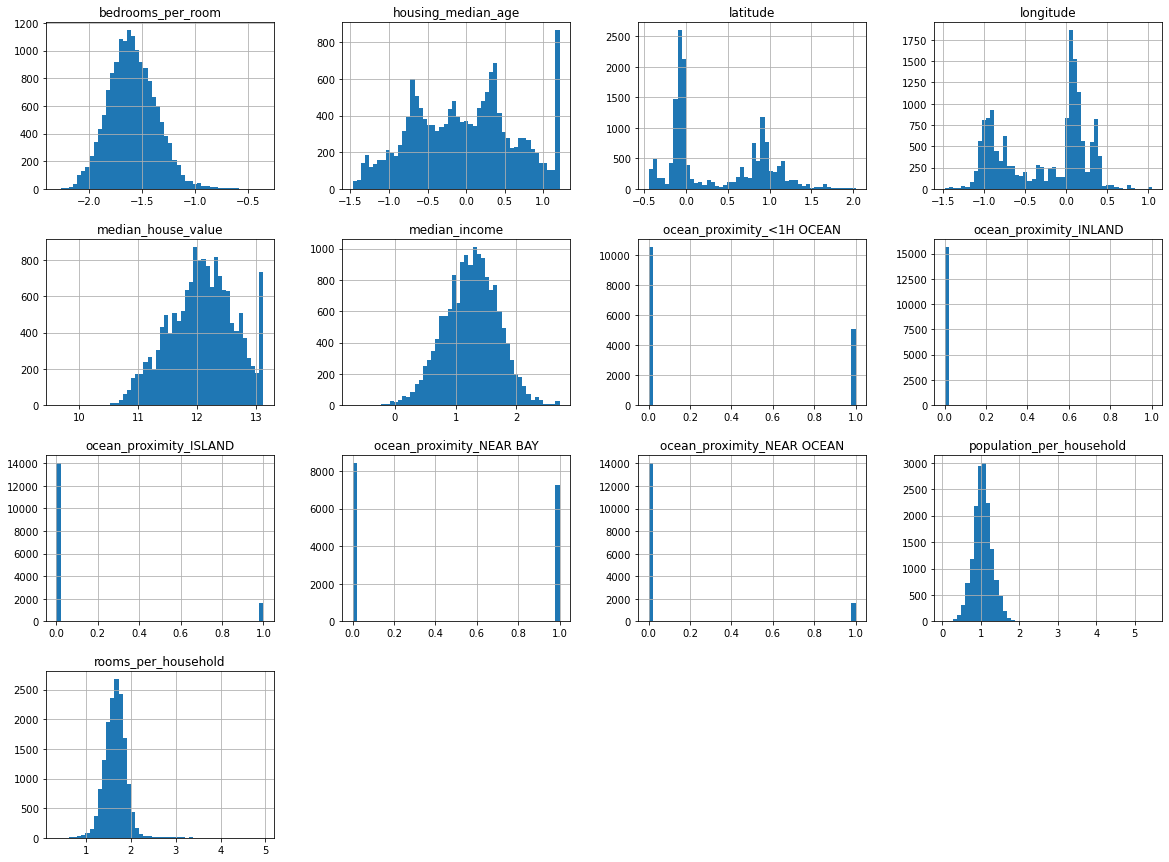

In [46]:
train_final.hist(bins=50, figsize=(20,15))
plt.show()

## Check the correlation

In [47]:
train_final.corr()
# still strong correlations among some features. may affect the intepretation of the model.

,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room,median_income,longitude,latitude,housing_median_age,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_ISLAND
median_house_value,1.000000,0.205463,-0.254365,-0.308551,0.685738,-0.011707,-0.205641,0.068908,0.361725,-0.581166,0.020207,0.146389,0.152261
rooms_per_household,0.205463,1.000000,-0.031115,-0.799661,0.547200,-0.076639,0.159222,-0.222977,-0.159490,0.205671,0.001912,-0.017147,-0.037860
population_per_household,-0.254365,-0.031115,1.000000,-0.036166,-0.072736,0.149647,-0.138939,-0.002394,0.130189,0.028493,-0.009835,-0.150335,-0.104179
bedrooms_per_room,-0.308551,-0.799661,-0.036166,1.000000,-0.715614,0.102532,-0.118280,0.158965,0.087099,-0.101631,0.020722,-0.014085,0.026634
median_income,0.685738,0.547200,-0.072736,-0.715614,1.000000,-0.009343,-0.092953,-0.152641,0.190973,-0.263326,-0.009352,0.053919,0.038412
longitude,-0.011707,-0.076639,0.149647,0.102532,-0.009343,1.000000,-0.922335,-0.083303,0.322095,-0.083170,0.009602,-0.476865,0.079361
latitude,-0.205641,0.159222,-0.138939,-0.118280,-0.092953,-0.922335,1.000000,-0.013902,-0.460852,0.382662,-0.017114,0.359346,-0.193300
housing_median_age,0.068908,-0.222977,-0.002394,0.158965,-0.152641,-0.083303,-0.013902,1.000000,0.058893,-0.236586,0.014869,0.244867,0.020216
ocean_proximity_NEAR BAY,0.361725,-0.159490,0.130189,0.087099,0.190973,0.322095,-0.460852,0.058893,1.000000,-0.645809,-0.014836,-0.318178,-0.319364
ocean_proximity_<1H OCEAN,-0.581166,0.205671,0.028493,-0.101631,-0.263326,-0.083170,0.382662,-0.236586,-0.645809,1.000000,-0.011103,-0.238118,-0.239005


In [50]:

from sklearn.linear_model import LassoCV
#lr = LogisticRegression( penalty="l1", solver ='saga').fit(x, y)
from sklearn.model_selection import train_test_split
x_train = train_final.drop(['median_house_value'], axis = 1)
y_train = train_final['median_house_value']
feature_name = list(x)
lr = LassoCV(cv=5, random_state=0).fit(x_train, y_train)
dict(zip(feature_name, lr.coef_))

{'rooms_per_household': 0.20144462528650192,
 'population_per_household': -0.44199928471088995,
 'bedrooms_per_room': 0.38670934103184534,
 'median_income': 0.7811392464876541,
 'longitude': -0.554545713577868,
 'latitude': -0.538388540018931,
 'housing_median_age': 0.050432899422174146,
 'ocean_proximity_NEAR BAY': 0.04116687341299036,
 'ocean_proximity_<1H OCEAN': -0.2566671799150612,
 'ocean_proximity_INLAND': 0.0,
 'ocean_proximity_NEAR OCEAN': -0.03431315245716336,
 'ocean_proximity_ISLAND': 0.0}

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
tree = RandomForestRegressor(n_estimators=100, max_leaf_nodes=16, n_jobs=-1).fit(x_train,y_train)
#tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(x,y)
select = SelectFromModel(tree, prefit=True)
#x_varname_selected =feature_name[select.get_support(indices=True)]

# Model Training 

We can create another pipeline for the training process, including anomaly PCA,feature selection and the final training.
For example, lets try feature selection + model training

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression

x_train = train_final.drop(['median_house_value'], axis = 1)
y_train = train_final['median_house_value']
pipeline_for_train = Pipeline([
    ('Feature_selection', SelectKBest()), # step 1 select parameters
    ('Regression',LinearRegression() ) # do model training
])


In [66]:
# 1.Use the pipeline for directly training
train_res = pipeline_for_train.fit(x_train,y_train)


In [68]:
# 2. Use the pipeline for a cross-validation analysis
from sklearn.model_selection import cross_val_score
#x, y = train_set.drop(['median_house_value'], axis = 1), train_set['median_house_value']
scores = cross_val_score(pipeline_for_train, x, y,scoring="neg_mean_squared_error", cv=10)  # check more on the document on cross_val_score

In [75]:
# A hyperparameter tuning. very simple syntax. Check the documentation for details.
# also check the random search.
from sklearn.model_selection import GridSearchCV
#x, y = train_set.drop(['median_house_value'], axis = 1), train_set['median_house_value']
param_grid = [
{'Feature_selection__k': [3, 5, 7], 'Regression__fit_intercept': [True,False]} # step name__parameter
]
grid_search = GridSearchCV(pipeline_for_train, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
search_res = grid_search.fit(x, y)

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [4]:
wine_x, wine_y = datasets.load_wine(return_X_y=True)
wine_df_x = pd.DataFrame(wine_x, columns=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                                          'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                                          'Color intensity', 'Hue', 'OD280/OD315', 'Proline'])
wine_df_y = pd.DataFrame(wine_y, columns=['Target'])
x_train, x_test, y_train, y_test = train_test_split(wine_df_x, wine_df_y, 
                                                    test_size=0.2, random_state=40, stratify=wine_df_y)


In [15]:
# define steps that need to be in the pipeline
steps = [('scaler', StandardScaler()), ('PCA', PCA()), ('DCT', DecisionTreeClassifier())]


# create pipeline object
pipeline_one = Pipeline(steps)

pipeline_one.fit(x_train, y_train)
pipeline_one.score(x_test, y_test) 


0.9444444444444444

In [20]:
# we can also change (set) the parameter of some steps
pipeline_one.named_steps['DCT'].get_params()
params_dct= {'max_depth': 3}
pipeline_one.named_steps['DCT'].set_params(**params_dct)

DecisionTreeClassifier(max_depth=3)

In [6]:
# define steps that need to be in the pipeline
steps_cv = [('scaler', StandardScaler()), ('PCA', PCA()), ('DCT', DecisionTreeClassifier())]
# create pipeline object
pipeline_cv = Pipeline(steps_cv)
# create a dictionary with parameters
parameters = {'DCT__criterion':['gini', 'entropy'], 'DCT__random_state':[10,20], 'DCT__max_depth':[5,10,15,20,25,30]}
pipeline

In [ ]:
grid_cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)
# fit the training dataset on grid_cv
grid_cv.fit(x_train, y_train)
print(grid_cv.score(x_test, y_test) )
print(grid_cv.best_params_) 
